# Import Libraries

In [1]:
import numpy as np
import pandas as pd
# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
# For randomized data splitting
from sklearn.model_selection import train_test_split,GridSearchCV

# To build linear regression_model

import statsmodels.api as sm
# to buil logisticregression
from sklearn.linear_model import LogisticRegression

# To check model performance
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay


# Problem 1: Linear Regression

## You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

##  Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

## load the data

In [2]:
df = pd.read_csv('cubic_zirconia.csv')

## EDA

## let's check the first 10 rows of the data

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.shape

(26967, 11)

In [5]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [6]:
df['carat'].nunique()

257

In [7]:
df['carat'].value_counts()

0.30    1331
0.31    1118
1.01    1111
0.70     959
0.32     950
        ... 
1.96       1
1.99       1
2.77       1
2.65       1
3.24       1
Name: carat, Length: 257, dtype: int64

## let's check the data types and number of values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [9]:
df.describe().round(2)

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.00,26967.00,26270.00,26967.00,26967.00,26967.00,26967.00,26967.00
mean,13484.00,0.80,61.75,57.46,5.73,5.73,3.54,3939.52
std,7784.85,0.48,1.41,2.23,1.13,1.17,0.72,4024.86
min,1.00,0.20,50.80,49.00,0.00,0.00,0.00,326.00
25%,6742.50,0.40,61.00,56.00,4.71,4.71,2.90,945.00
50%,13484.00,0.70,61.80,57.00,5.69,5.71,3.52,2375.00
75%,20225.50,1.05,62.50,59.00,6.55,6.54,4.04,5360.00
max,26967.00,4.50,73.60,79.00,10.23,58.90,31.80,18818.00


## let's check duplicates

In [10]:
# check for duplicates and remove if any
df.duplicated().sum()

0

In [11]:
# drop the unnamed column as it doesnt help in prediction
df.drop('Unnamed: 0', axis=1, inplace=True)

# Univariate Analysis categorical variables

In [12]:
# unique values and value counts of the categorical columns
for cols in df.columns:
    if df[cols].dtype == 'object':
        print(cols)
        print(df[cols].unique())
        print(df[cols].value_counts())
        print('-------------------------------------')

cut
['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64
-------------------------------------
color
['E' 'G' 'F' 'D' 'H' 'J' 'I']
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64
-------------------------------------
clarity
['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64
-------------------------------------


# Univariate Analysis of Numeric Variables

In [13]:
# creating a list of column names that are numeric
numcols = [cols for cols in df.columns if df[cols].dtype != 'object']
numcols 

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

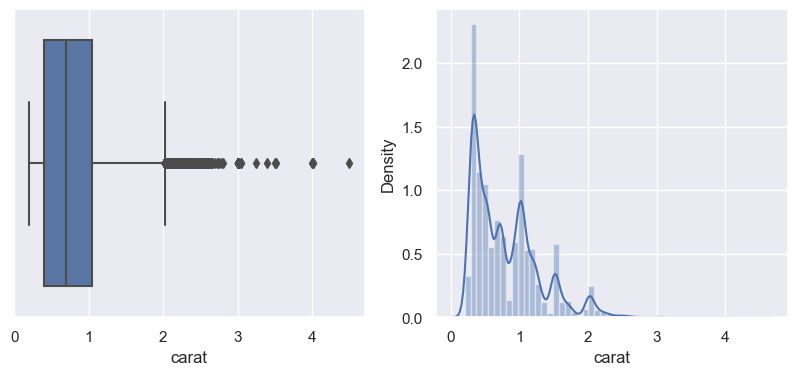

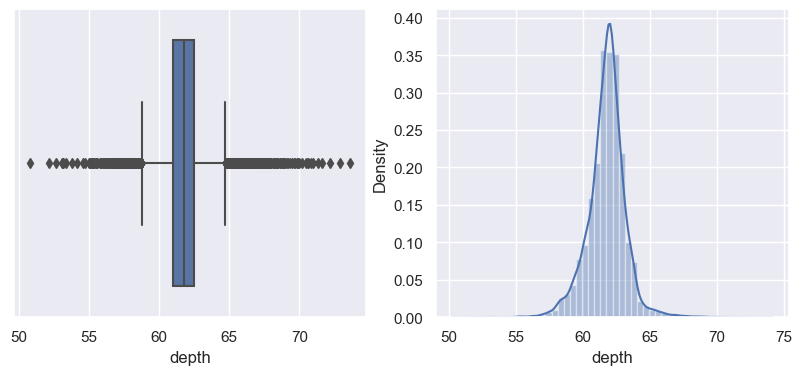

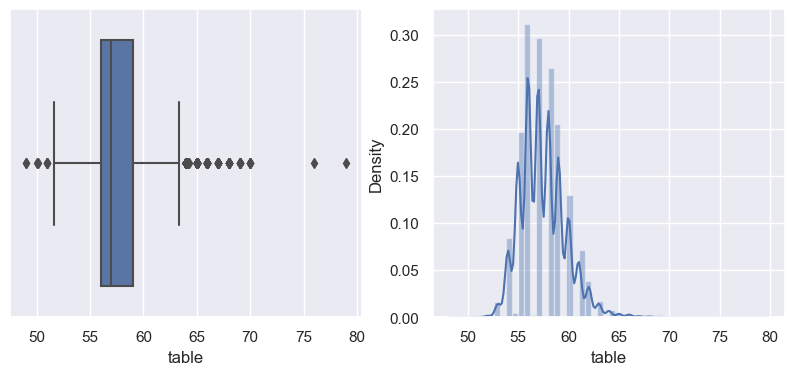

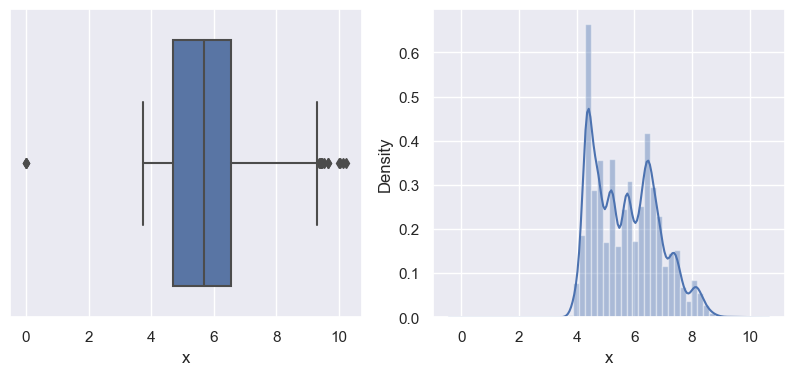

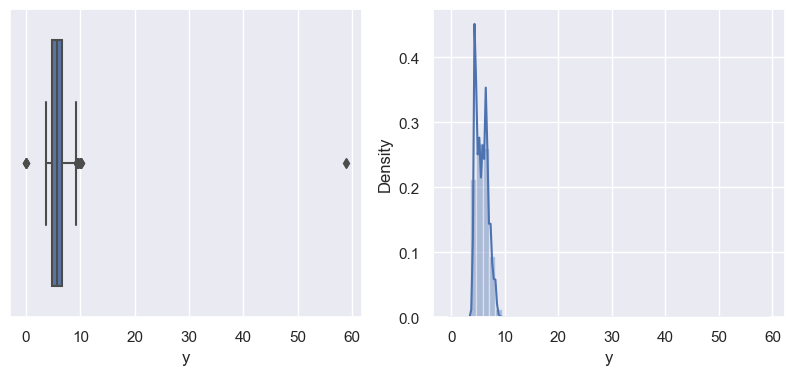

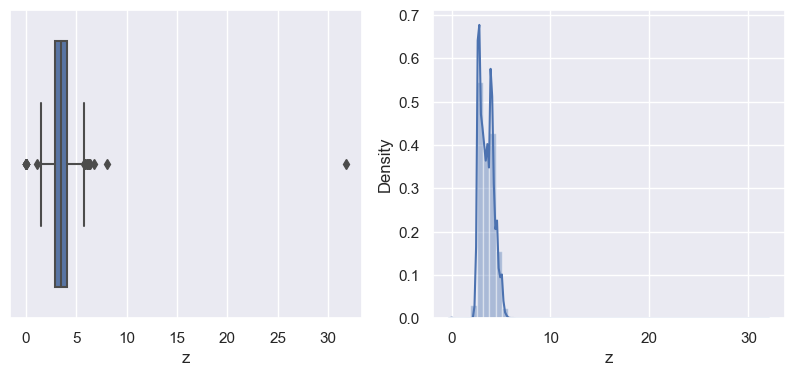

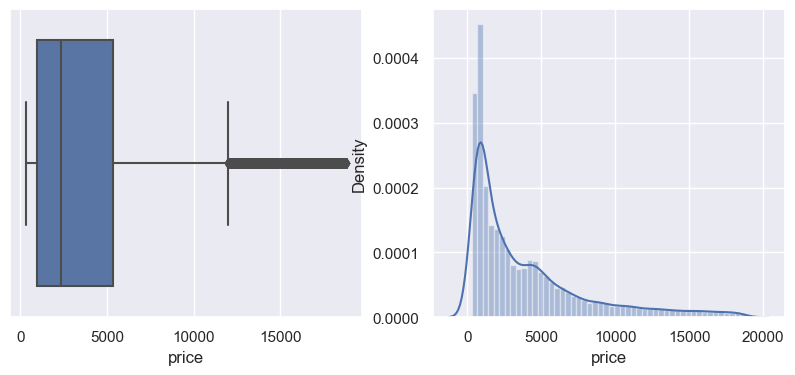

In [14]:
# Box plot & density plot of each numerical columns as a subplot
for cols in numcols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.boxplot(df[cols])
    plt.subplot(1,2,2)
    sns.distplot(df[cols])
    plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


## Outlier Checks & Treatment

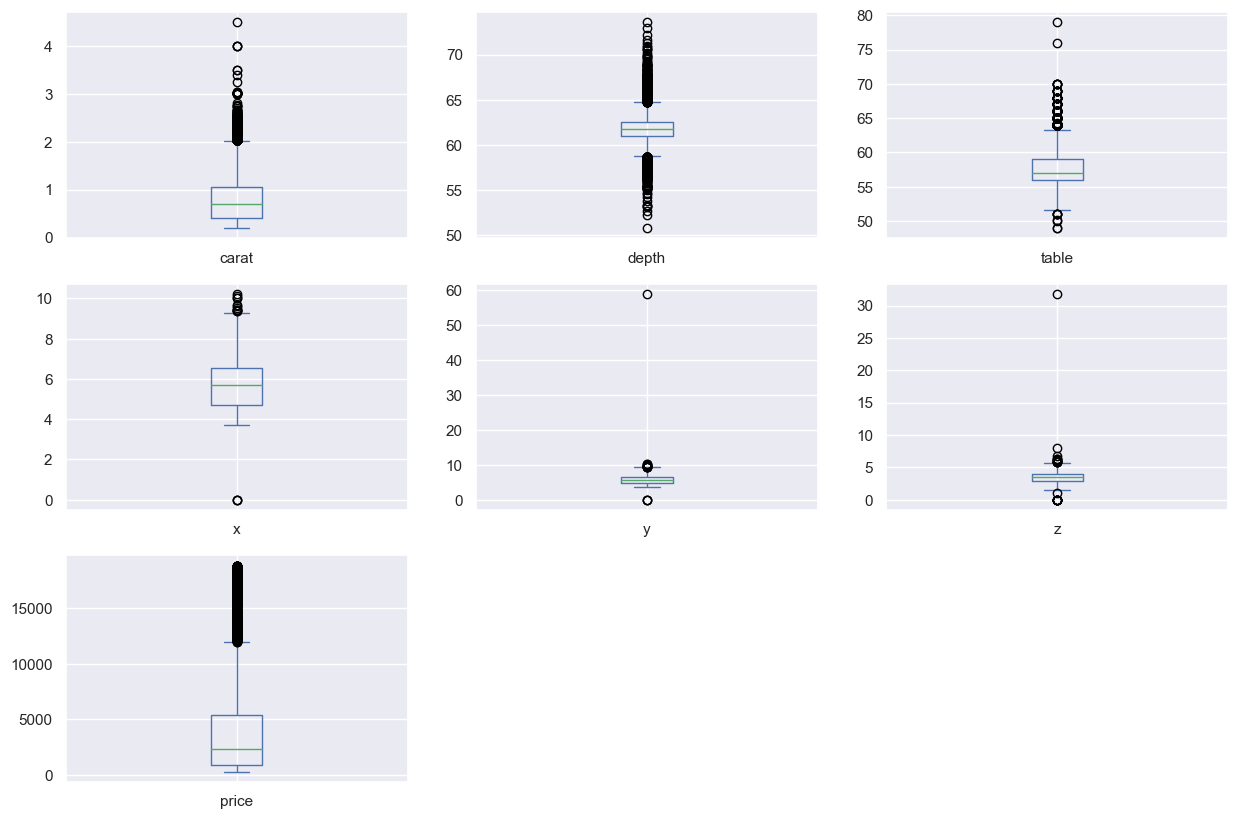

In [16]:
df[numcols].plot(kind='box', subplots=True, layout=(3,3), figsize=(15,10));

In [17]:
# user defined function to get upper and lower bounds of numeric columns for outlier capping and flooring
def get_bounds(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    return upper_bound, lower_bound

In [18]:
for cols in numcols:
        upper_bound, lower_bound = get_bounds(df,cols)
        df[cols] = np.where(df[cols]>upper_bound, upper_bound, df[cols])
        df[cols] = np.where(df[cols]<lower_bound, lower_bound, df[cols])


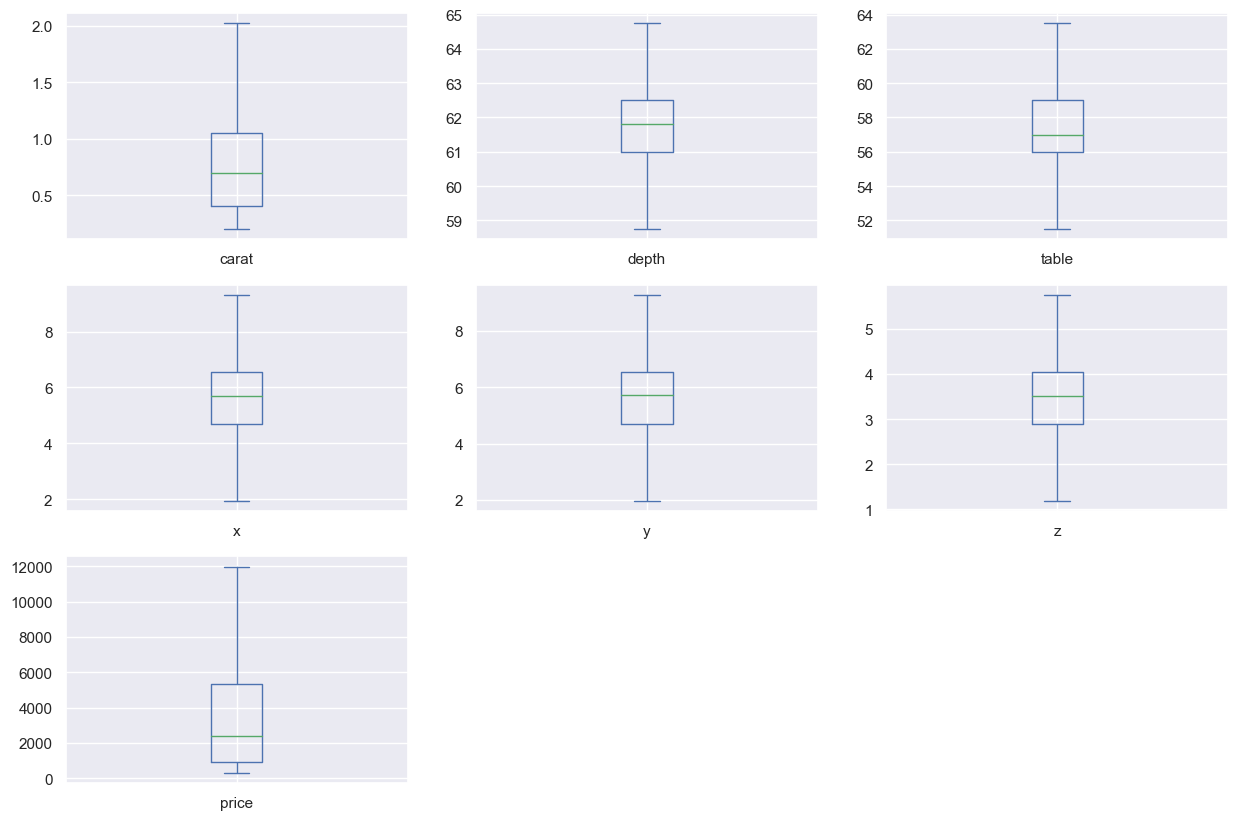

In [19]:
# Check if outliers have been capped using boxplot
df[numcols].plot(kind='box', subplots=True, layout=(3,3), figsize=(15,10));

# Bi-Variate Analysis - Numeric Features

## Correlation Plot

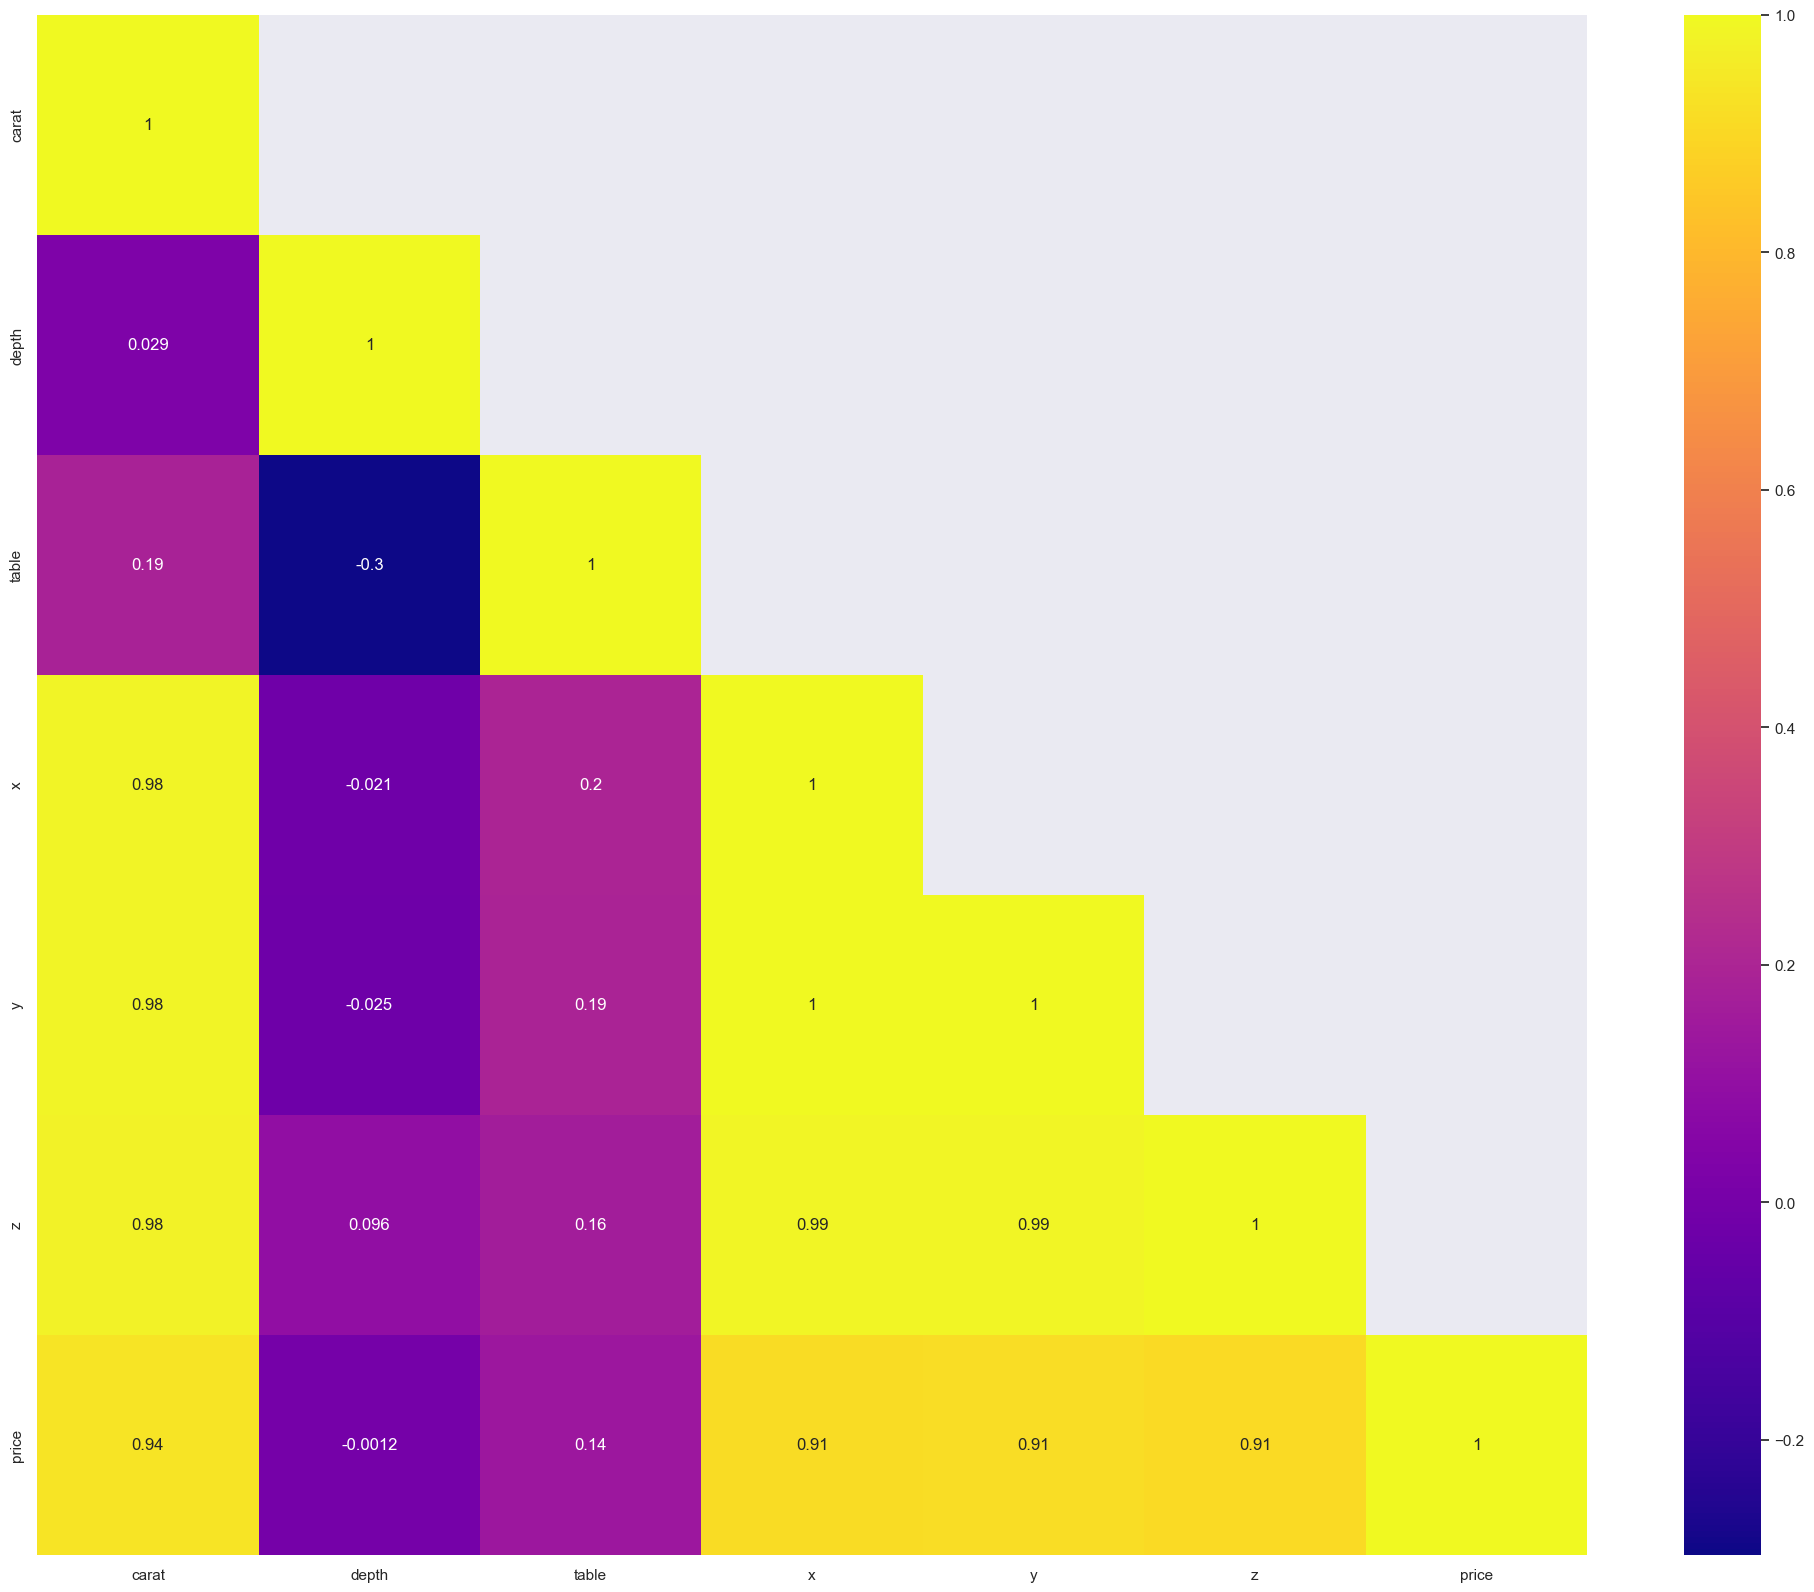

In [20]:
# heatmap with upper triangle elements masked
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, mask=np.triu(df.corr(), k=1),cmap='plasma');

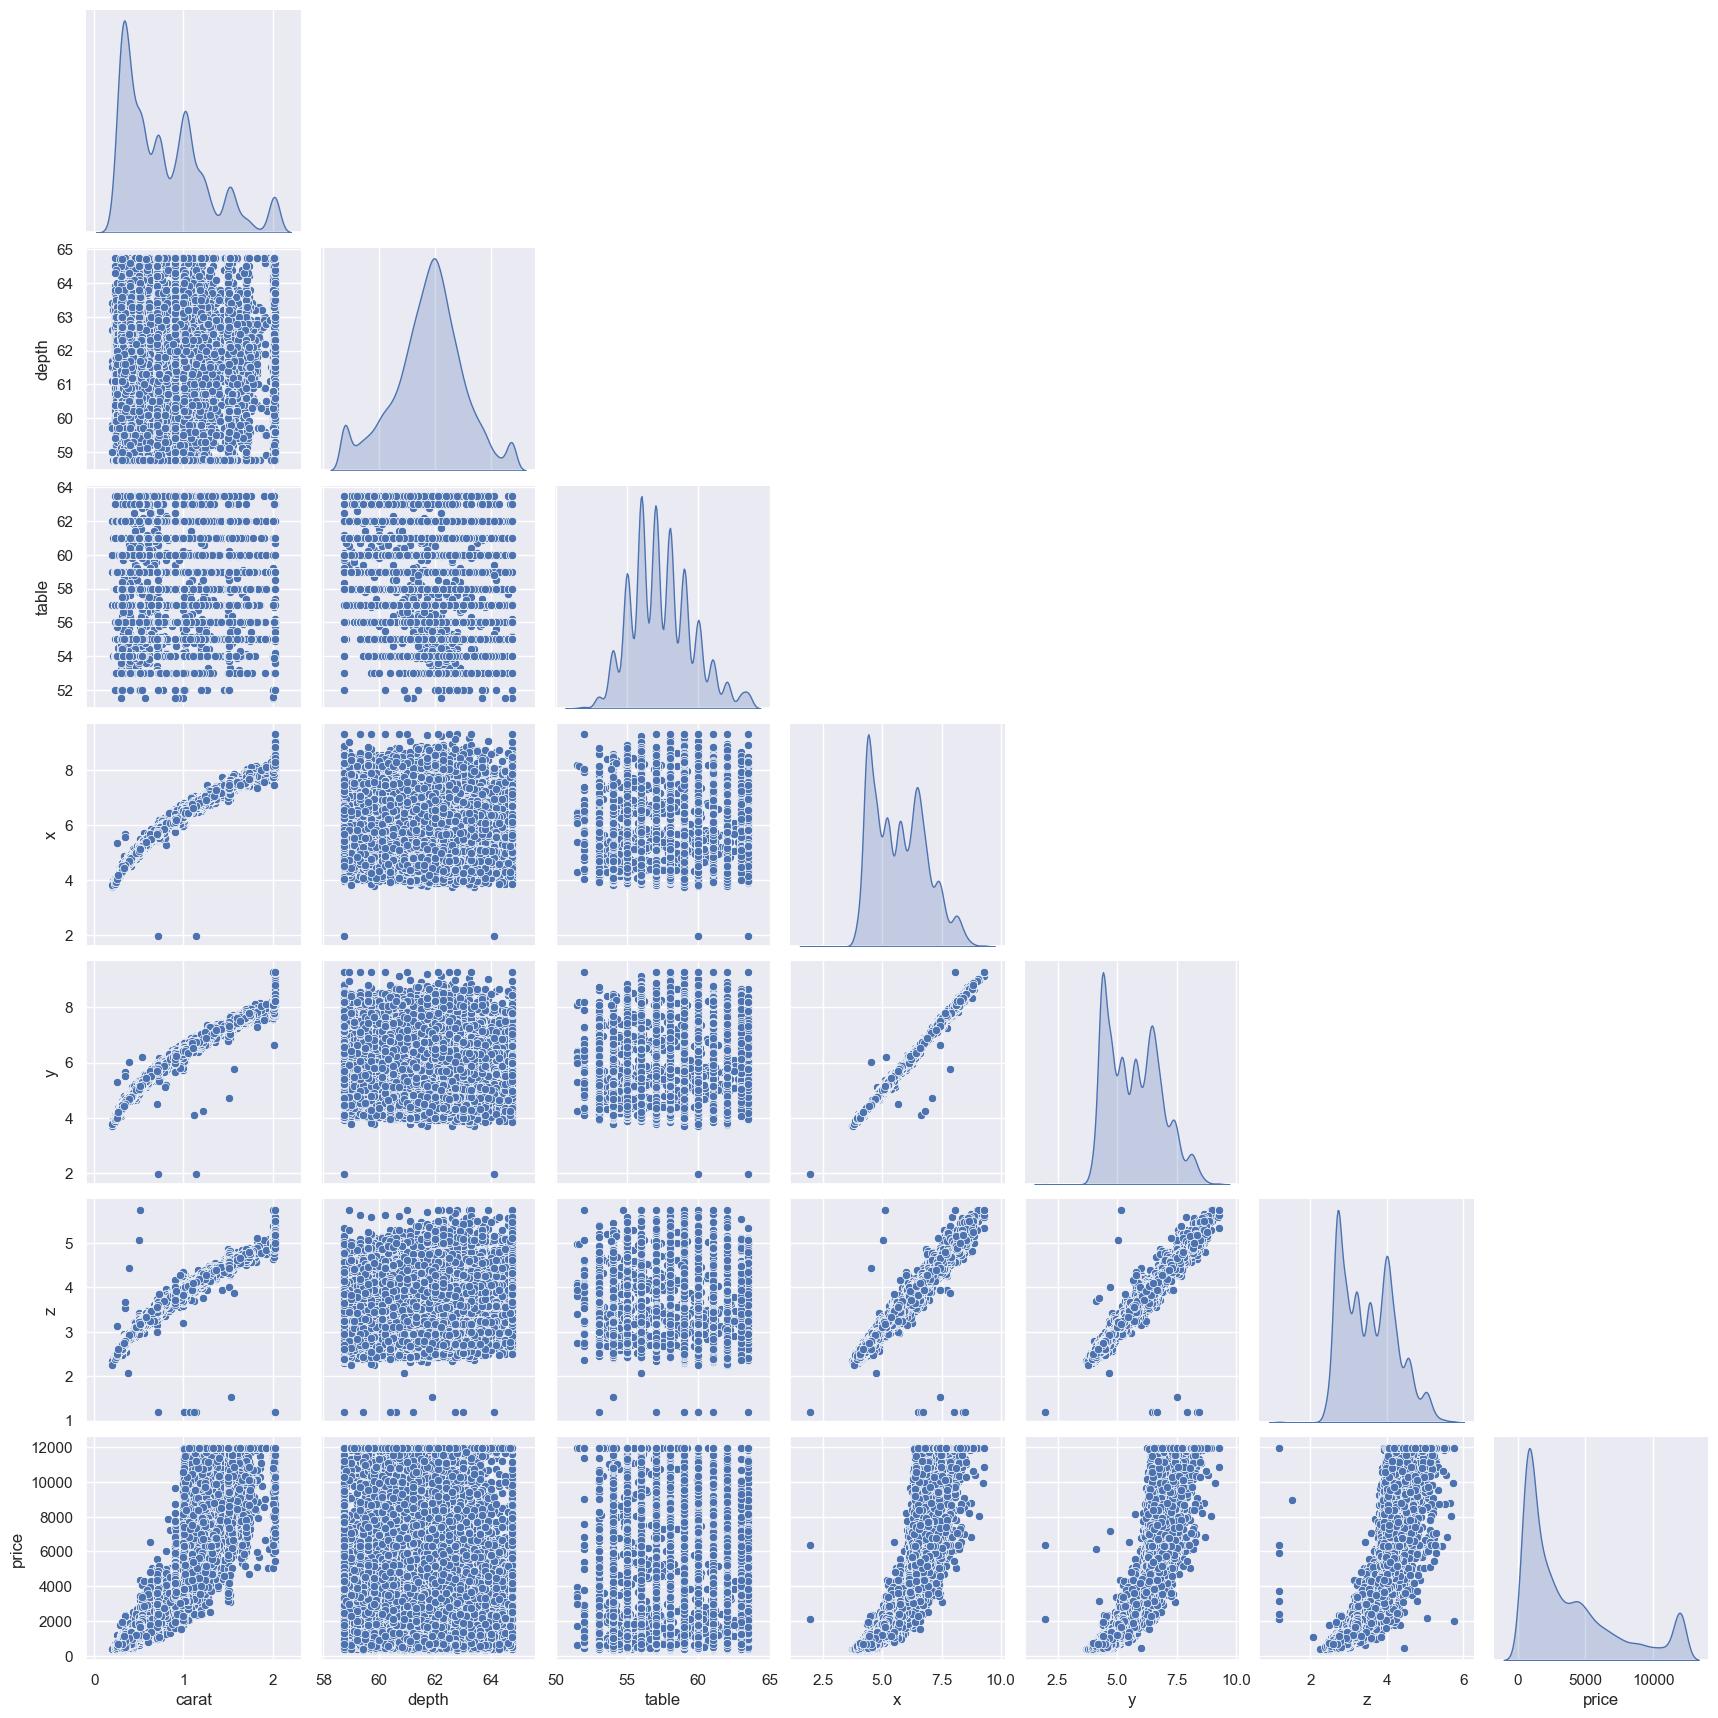

In [21]:
# pairplot of all the numeric columns
sns.pairplot(df[numcols], diag_kind='kde',corner=True);

##  Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.
​

## Check for Missing Values

In [22]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

## Imputing missing values

In [23]:
# impute using median values of the respective columns
for cols in numcols:
    df[cols].fillna(df[cols].median(), inplace=True)


In [24]:
# creating a list of column names that are numeric
numcols = [cols for cols in df.columns if df[cols].dtype != 'object']
numcols

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [25]:
# check for missing values again to cross verify
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

##  Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

## Converting categorical to dummy variables (Encoding)

In [26]:
# unique values and value counts of the categorical columns
for cols in df.columns:
    if df[cols].dtype == 'object':
        print(cols)
        print(df[cols].unique())
        print(df[cols].value_counts())
        print('-------------------------------------')

cut
['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64
-------------------------------------
color
['E' 'G' 'F' 'D' 'H' 'J' 'I']
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64
-------------------------------------
clarity
['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64
-------------------------------------


In [27]:
# cut,color,clarity
catcols = [cols for cols in df.columns if df[cols].dtype == 'object']
catcols

['cut', 'color', 'clarity']

In [28]:
# one hot encoding of the categorical columns
df = pd.get_dummies(df, columns=catcols, drop_first=True)

In [29]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
for cols in df.columns:
    if df[cols].dtype == 'uint8':
        print(cols)
        print(df[cols].unique())
        print(df[cols].value_counts())
        print('-------------------------------------')

cut_Good
[0 1]
0    24526
1     2441
Name: cut_Good, dtype: int64
-------------------------------------
cut_Ideal
[1 0]
0    16151
1    10816
Name: cut_Ideal, dtype: int64
-------------------------------------
cut_Premium
[0 1]
0    20068
1     6899
Name: cut_Premium, dtype: int64
-------------------------------------
cut_Very Good
[0 1]
0    20937
1     6030
Name: cut_Very Good, dtype: int64
-------------------------------------
color_E
[1 0]
0    22050
1     4917
Name: color_E, dtype: int64
-------------------------------------
color_F
[0 1]
0    22238
1     4729
Name: color_F, dtype: int64
-------------------------------------
color_G
[0 1]
0    21306
1     5661
Name: color_G, dtype: int64
-------------------------------------
color_H
[0 1]
0    22865
1     4102
Name: color_H, dtype: int64
-------------------------------------
color_I
[0 1]
0    24196
1     2771
Name: color_I, dtype: int64
-------------------------------------
color_J
[0 1]
0    25524
1     1443
Name: color_J, dtype

# Split Data

In [31]:
# independent variables
X = df.drop(["price"], axis=1)
# dependent variable
y = df[["price"]]

In [32]:
X

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
26963,0.33,61.9,55.0,4.44,4.42,2.74,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
26964,0.51,61.7,58.0,5.12,5.15,3.17,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26965,0.27,61.8,56.0,4.19,4.20,2.60,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


## We will now split X and y into train and test sets in a 70:30 ratio.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# Linear Regression Model

In [34]:
# to refer the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression
line_reg = LinearRegression()
line_reg.fit(X_train, y_train)

LinearRegression()

In [35]:
# get the values of the coefficients
line_reg.coef_

array([[ 9.09053127e+03,  6.39148443e+00, -2.19791903e+01,
        -1.14147960e+03,  1.01045663e+03, -5.08518799e+02,
         4.17572129e+02,  6.48090775e+02,  6.27020731e+02,
         5.49924916e+02, -2.10212238e+02, -2.81660937e+02,
        -4.60993998e+02, -8.55958559e+02, -1.35225673e+03,
        -1.91560258e+03,  4.05491490e+03,  2.59387176e+03,
         1.76439841e+03,  3.40624862e+03,  3.11991426e+03,
         3.82889533e+03,  3.80844498e+03]])

In [36]:
# get the intercept coefficient
line_reg.intercept_

array([-2992.62348525])

# Model Evaluation

## R-Squared

In [37]:
# R square on training data
r_train = line_reg.score(X_train, y_train)
r_test = line_reg.score(X_test, y_test)
r_train, r_test

(0.940307165548188, 0.9415117938724883)

94% of the variation in the price is explained by the predictors in the model for train set

# RMSE

In [38]:
#RMSE on Training data
train_pred = line_reg.predict(X_train)
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
rmse_train

843.7765260400255

In [39]:
# another way of calculating rmse using statsmodels library
from statsmodels.tools.eval_measures import rmse
rmse_train = rmse(y_train, train_pred)
rmse_train

array([843.77652604])

In [40]:
#RMSE on Testing data
rmse_test = rmse(y_test, line_reg.predict(X_test))
rmse_test

array([848.96331995])

In [41]:
rmse_test*100/df['price'].mean()

array([22.71222102])

# Linear Regression using statsmodels

In [42]:
# import OLS from statsmdoels library
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

In [43]:
# add a constant column to X_train for the intercept in the fitted linear regression model
X_train_sm = sm.add_constant(X_train) # has_constant() to check if a constant is already present



In [44]:
# head of dataframe with constant column
X_train_sm.head()


,const,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
19040,1.0,1.170,60.4,63.5,6.81,6.77,4.10,1,0,0,...,0,0,0,0,0,1,0,0,0,0
396,1.0,1.200,61.1,55.0,6.86,6.89,4.20,0,1,0,...,0,0,0,0,0,0,0,0,1,0
15626,1.0,0.310,61.6,59.0,4.31,4.33,2.66,0,0,0,...,0,1,0,0,0,0,0,0,0,1
16597,1.0,2.025,62.5,56.0,8.31,8.24,5.18,0,1,0,...,0,1,0,0,0,1,0,0,0,0
5811,1.0,0.300,62.1,57.0,4.27,4.30,2.66,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [45]:
# fit the model on training data
lr_sm = OLS(y_train, X_train_sm).fit()


In [46]:
# summary of the model
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.291e+04
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:25:30   Log-Likelihood:            -1.5397e+05
No. Observations:               18876   AIC:                         3.080e+05
Df Residuals:                   18852   BIC:                         3.082e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2992.6235    709.755     -4.216

In [47]:
# predict on training data and test data and save the predictions
pred_train = lr_sm.predict(X_train_sm)
pred_test = lr_sm.predict(sm.add_constant(X_test))

In [48]:
# calculate rmse on trainig data and test data predictions
rmse_train = rmse(y_train, pred_train)
rmse_test = rmse(y_test, pred_test)
rmse_train, rmse_test

(array([4031.05958526, 5727.95950228, 5052.30497245, ..., 4006.4967784 ,
        6206.47314084, 4645.59285181]),
 array([4172.01595601, 5301.92983652, 5007.1287407 , ..., 6848.52853024,
        3751.24751229, 4216.10376014]))

In [49]:
rmse_train

array([4031.05958526, 5727.95950228, 5052.30497245, ..., 4006.4967784 ,
       6206.47314084, 4645.59285181])

# Problem 2: Logistic Regression and LDA

## You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

##  Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

# Load the Dataset

In [50]:
df2=pd.read_csv("Holiday_Package.csv")

# EDA

## Shape, Head & Info

In [51]:
df2.shape

(872, 8)

In [52]:
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [54]:
df2.dtypes

Unnamed: 0            int64
Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

## Duplicated Observations

In [55]:
df2.duplicated().sum()

0

In [56]:
# drop the unnamed column as it doesnt help in prediction
df2.drop('Unnamed: 0', axis=1, inplace=True)

## Statistical Summary of Numeric Features

In [57]:
df2.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.17,23418.67,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.96,10.55,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.31,3.04,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.31,0.61,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.98,1.09,0.0,0.0,1.0,2.0,6.0


In [58]:
len(df2[df2['no_young_children']==0])*100/len(df2)

76.26146788990826

In [59]:
len(df2[df2['no_older_children']==0])*100/len(df2)

45.06880733944954

# Univariate Analysis

In [60]:
# unique values and value counts of the categorical columns
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print(feature, ' Number of Levels', df2[feature].nunique())
        print(df2[feature].value_counts())
        print('\n')

Holliday_Package  Number of Levels 2
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign  Number of Levels 2
no     656
yes    216
Name: foreign, dtype: int64




## Univariate Analysis of Numeric Variables

In [61]:
# creating a list of column names that are numeric
numcols = [cols for cols in df2.columns if df2[cols].dtype != 'object']
numcols

['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']

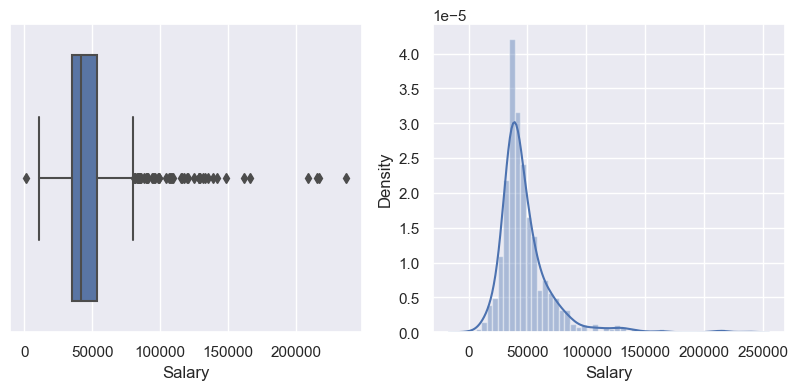

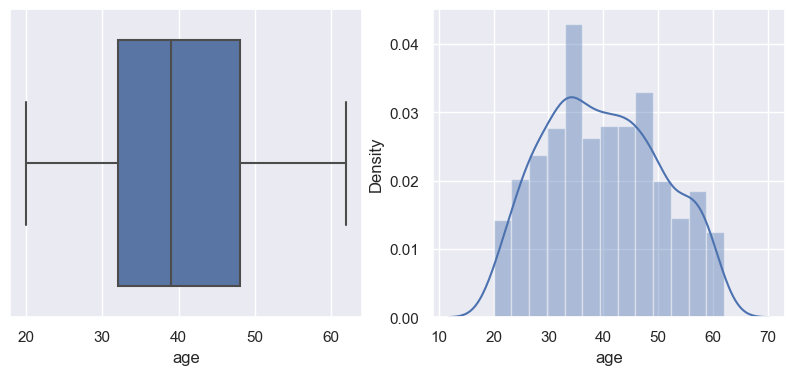

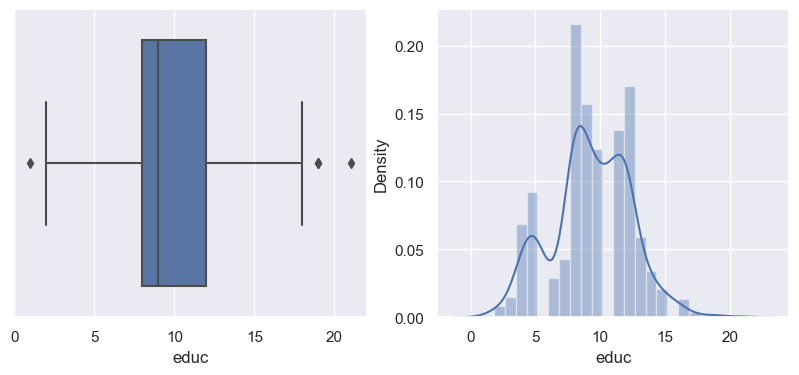

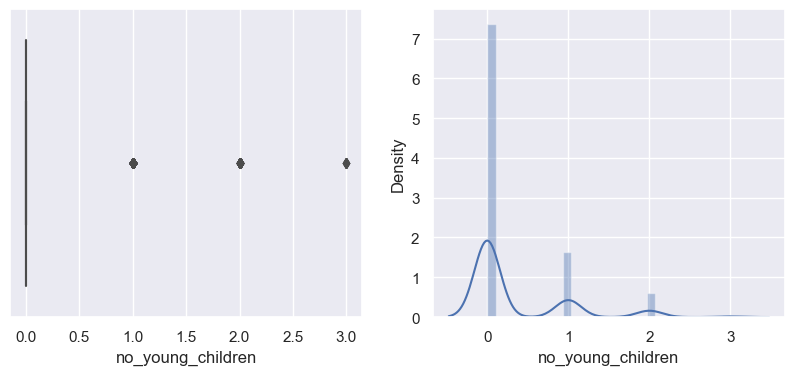

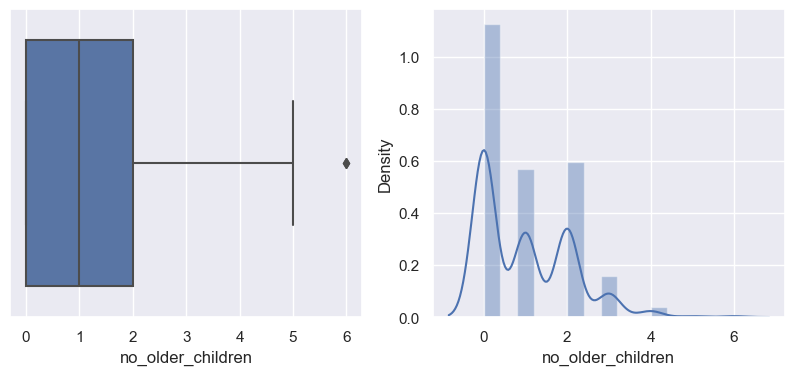

In [62]:
# Box plot & density plot of each numerical columns as a subplot
for cols in numcols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.boxplot(df2[cols])
    plt.subplot(1,2,2)
    sns.distplot(df2[cols])
    plt.show()

## Treating the outliers

We can treat Outliers with the following code. We will treat the outliers for the 'edu'and'no_older_children' variables only. no_young_children, more than 75% values are zero, so capping the outliers would mean converting all non-zero values to zero. Also, for salary, these seem to be genuine values and not error values reflecting as outliers.

In [63]:
def remove_outlier(cols):

    Q1,Q3=np.percentile(cols,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [64]:
lr,ur=remove_outlier(df2['educ'])

print('Lower Range :',lr,'\nUpper Range :',ur)

df2['educ']=np.where(df2['educ']>ur,
                     ur,
                     df2['educ'])

df2['educ']=np.where(df2['educ']<lr,
                     lr,
                     df2['educ'])

Lower Range : 2.0 
Upper Range : 18.0


In [65]:
lr,ur=remove_outlier(df2['no_older_children'])

print('Lower Range :',lr,'\nUpper Range :',ur)

df2['no_older_children']=np.where(df2['no_older_children']>ur,
                     ur,
                     df2['no_older_children'])

df2['no_older_children']=np.where(df2['no_older_children']<lr,
                     lr,
                     df2['no_older_children'])

Lower Range : -3.0 
Upper Range : 5.0


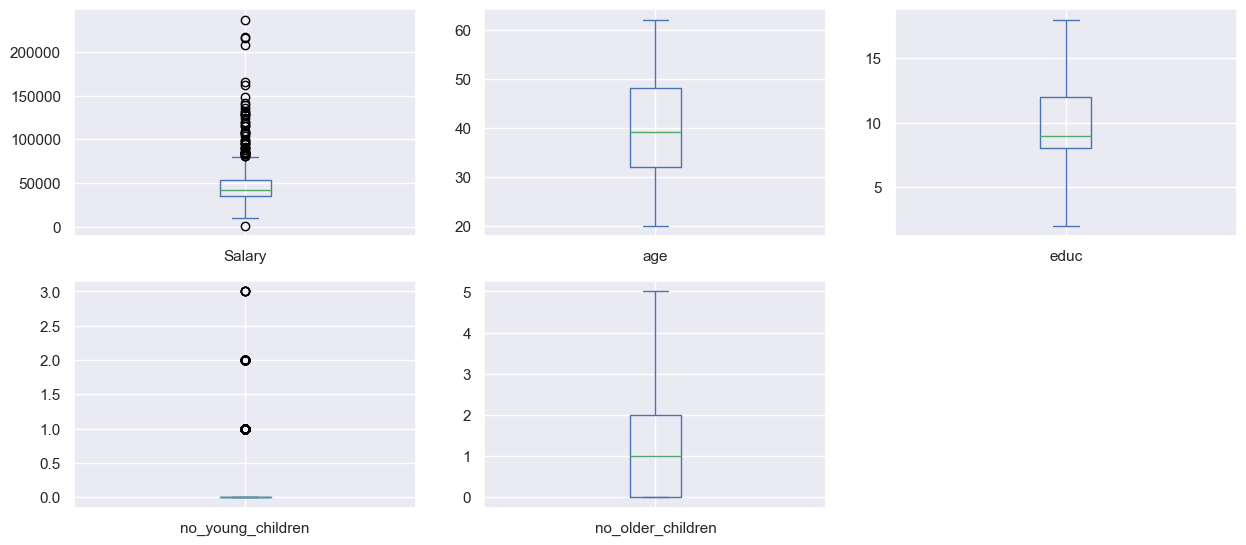

In [66]:
# Check if outliers have been capped using boxplot
df2[numcols].plot(kind='box', subplots=True, layout=(3,3), figsize=(15,10));

# Bivariate Analysis

## Numeric Features - Checking for Correlations.

In [67]:
df2.corr().round(2)

,Salary,age,educ,no_young_children,no_older_children
Salary,1.00,0.07,0.33,-0.03,0.12
age,0.07,1.00,-0.15,-0.52,-0.12
educ,0.33,-0.15,1.00,0.10,-0.04
no_young_children,-0.03,-0.52,0.10,1.00,-0.24
no_older_children,0.12,-0.12,-0.04,-0.24,1.00


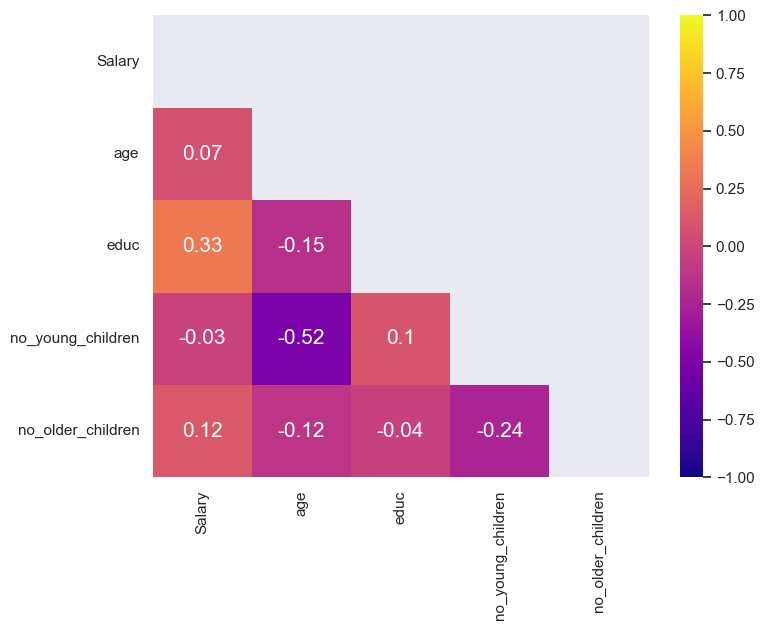

In [68]:
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr().round(2), 
            cmap='plasma', 
            vmin=-1, 
            vmax=1, 
            annot=True,
            annot_kws={'size':15},
            mask=np.triu(df2.corr())
           )
plt.yticks(rotation = 0);

In [69]:
df2.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

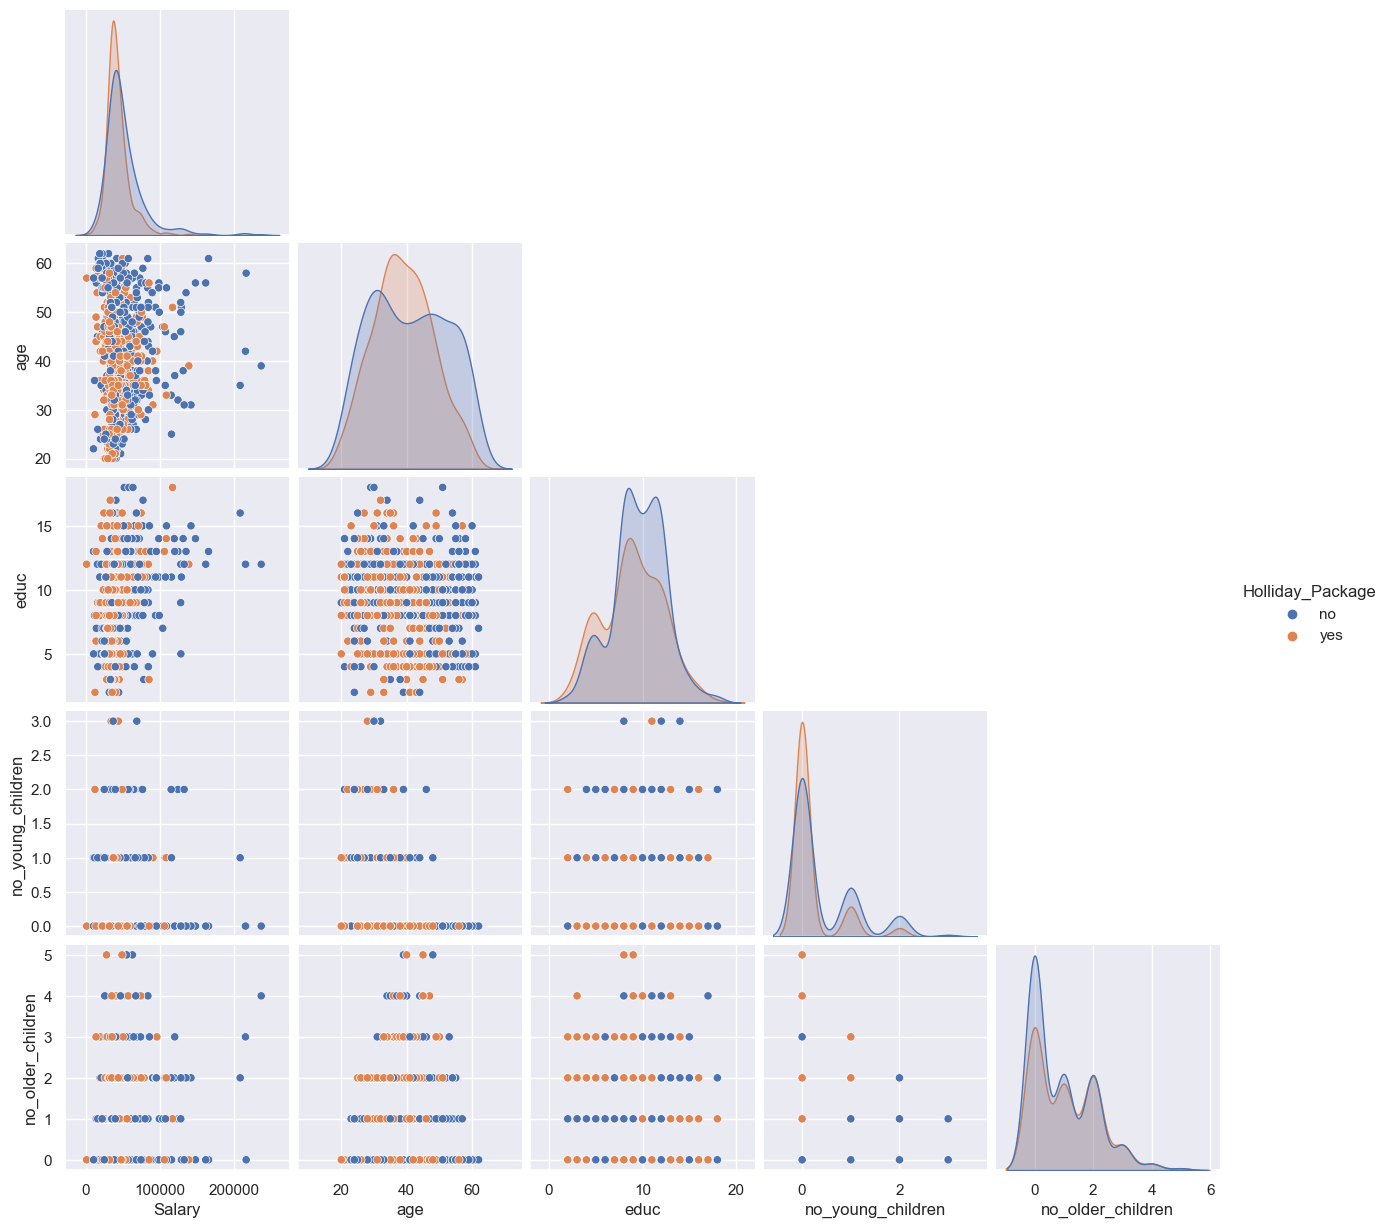

In [70]:
# Pairplot using sns
sns.pairplot(df2 ,
             diag_kind='kde',
             hue='Holliday_Package',
             corner=True);

##  Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

## Encoding Categorical Feature Labels

In [71]:
df2['foreign']=np.where(df2['foreign'] =='no', '0', df2['foreign'])
df2['foreign']=np.where(df2['foreign'] =='yes', '1', df2['foreign'])

In [72]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8.0,1,1.0,0
1,yes,37207,45,8.0,0,1.0,0
2,no,58022,46,9.0,0,0.0,0
3,no,66503,31,11.0,2,0.0,0
4,no,66734,44,12.0,0,2.0,0


In [73]:
df2['foreign'] = df2['foreign'].astype('int64') # to_numeric()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    int64  
 2   age                872 non-null    int64  
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 47.8+ KB


In [74]:
## Converting the '  Holliday_Package' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [75]:
## Applying the created Label Encoder object for the target class
## Assigning the 0 to no and 1 to yes

df2['Holliday_Package'] = LE.fit_transform(df2['Holliday_Package'])
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8.0,1,1.0,0
1,1,37207,45,8.0,0,1.0,0
2,0,58022,46,9.0,0,0.0,0
3,0,66503,31,11.0,2,0.0,0
4,0,66734,44,12.0,0,2.0,0


## Train Test Split

In [76]:
# Copy all the predictor variables into X dataframe
X = df2.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df2['Holliday_Package']

In [77]:
# check target variable class proportion
df2['Holliday_Package'].value_counts(1)

0    0.540138
1    0.459862
Name: Holliday_Package, dtype: float64

In [78]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30 , 
                                                    random_state=1,
                                                    stratify=y)

In [79]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [80]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

# Logistic Regression Model

In [81]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',
                           max_iter=10000,
                           penalty='none',
                           verbose=True,
                           n_jobs=2,
                           random_state=123)


model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    8.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', random_state=123,
                   solver='newton-cg', verbose=True)

## Prediction on Train & Test Dataset

## Class Label Prediction

In [82]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [83]:
ytest_predict[:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [84]:
ytrain_predict[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

## Class Probability Prediction

In [85]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685513,0.314487
1,0.540271,0.459729
2,0.697246,0.302754
3,0.498757,0.501243
4,0.557590,0.442410


##  Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

## Model Evaluation

## Training Data

## Accuracy

In [86]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6672131147540984

## AUC and ROC for the training data

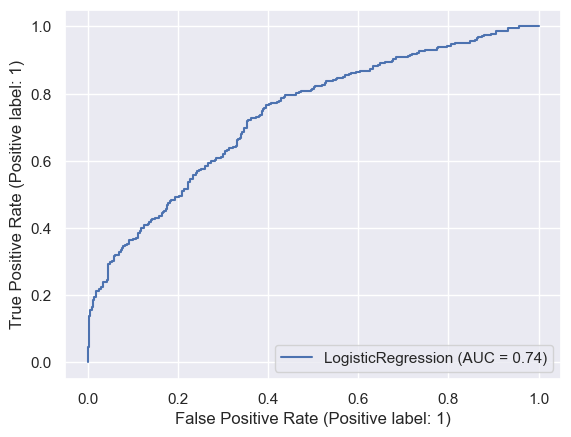

In [87]:
RocCurveDisplay.from_estimator(model,X_train,y_train);

## Confusion Matrix & Classification Report Metrics

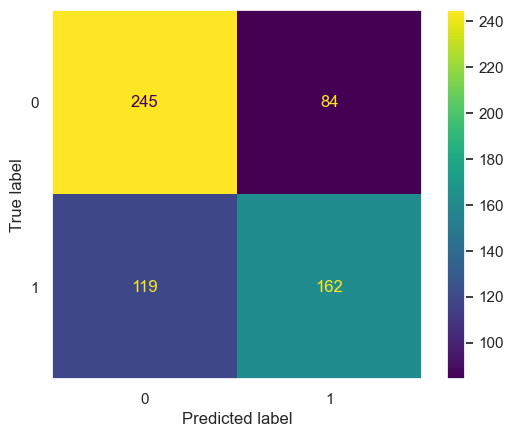

In [88]:
ConfusionMatrixDisplay.from_estimator(model,X_train,y_train)
plt.grid();

In [89]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.61       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



## Test Data

## Accuracy

In [90]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6564885496183206

## AUC and ROC

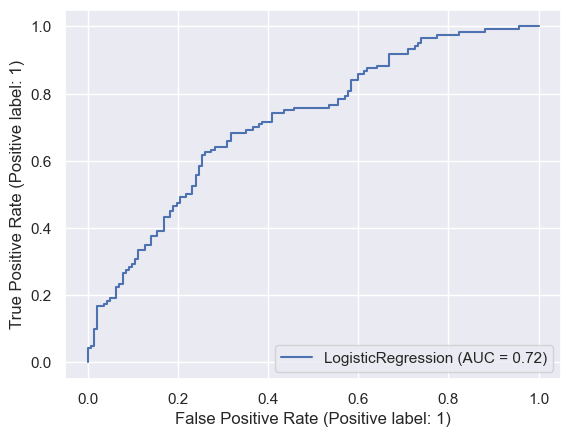

In [91]:
RocCurveDisplay.from_estimator(model,X_test,y_test); # plot_roc_curve

## Confusion Matrix & Classification Report Metrics

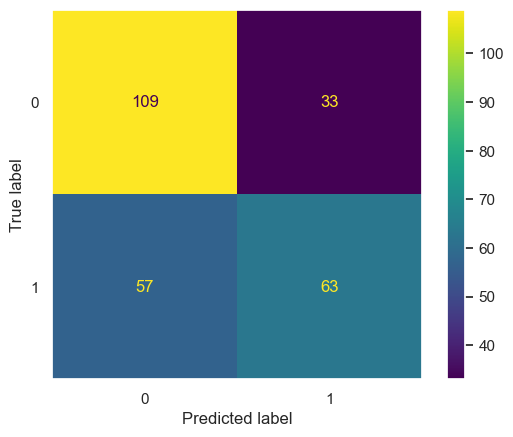

In [92]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
plt.grid();

In [93]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       142
           1       0.66      0.53      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262



# Linear Discriminant Analysis

In [94]:
#Build LDA Model & fit on training data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)


LinearDiscriminantAnalysis()

## Prediction

In [95]:
#get the class labels prediction on train & test data and save it
pred_train = lda.predict(X_train)
pred_test = lda.predict(X_test)


## Model Evaluation

## Training Data

In [96]:
ytrain_predict = lda.predict(X_train)
ytest_predict = lda.predict(X_test)

In [97]:
lda.score(X_train, y_train)

0.6639344262295082

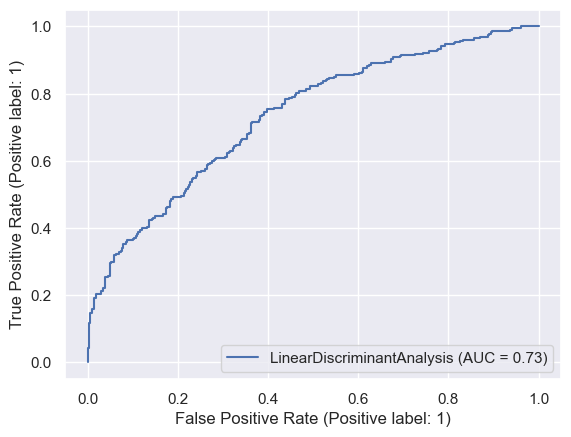

In [98]:
RocCurveDisplay.from_estimator(lda,X_train,y_train);

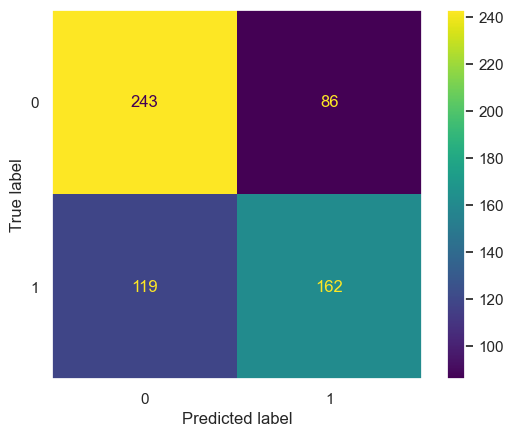

In [99]:
ConfusionMatrixDisplay.from_estimator(lda,X_train,y_train)
plt.grid();

In [100]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



## Test Data

In [101]:
lda.score(X_test, y_test)

0.6450381679389313

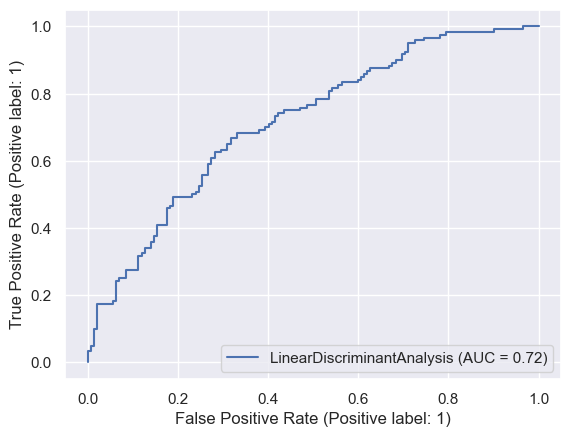

In [102]:
RocCurveDisplay.from_estimator(lda,X_test,y_test); # plot_roc_curve

## Confusion Matrix & Classification Report Metrics

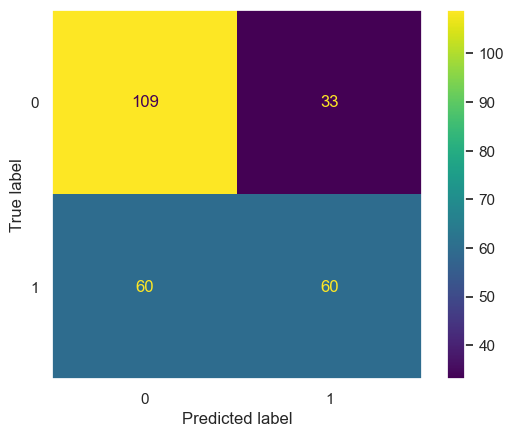

In [103]:
ConfusionMatrixDisplay.from_estimator(lda,X_test,y_test)
plt.grid();

In [104]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.65      0.50      0.56       120

    accuracy                           0.65       262
   macro avg       0.65      0.63      0.63       262
weighted avg       0.65      0.65      0.64       262

